### Data:
* URL: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/goyal/Downloads/archive/AB_NYC_2019.csv")

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Columns 'name', 'host_name', 'last_review ' and 'reviews_per_month' are missing values. Not all columns are numerical data. 'name', 'host_name' have no use for us.

Continuous features: id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365  

Categorical Features: name, host_name, neighbourhood_group, neighbourhood, room_type

While some of the continuous features may have numerical representations(id, host_id), they are still considered categorical because they represent distinct categories or labels rather than numerical quantities. Also,"last_review" feature is not truly continuous, as it represents dates rather than numerical quantities. 

In [4]:
#Check correlation with price
df.corr()['price']

C:\Users\goyal\AppData\Local\Temp\ipykernel_15144\2315221162.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


id                                0.010619
host_id                           0.015309
latitude                          0.033939
longitude                        -0.150019
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
availability_365                  0.081829
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

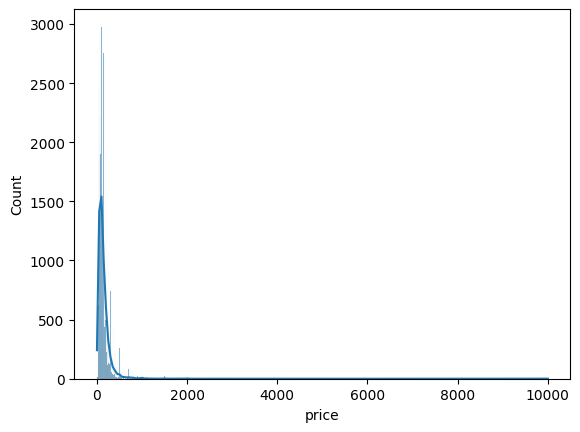

In [5]:
# Create a histogram of the 'price' feature
import seaborn as sns
sns.histplot(df["price"], kde=True)

This plot shows the distribution of prices in the dataset. We can see that the majority of properties have a price of less than $1000, but there are some properties with much higher prices.

Overall, it seems likely that all the other features could be useful predictors of price, to varying degrees. 

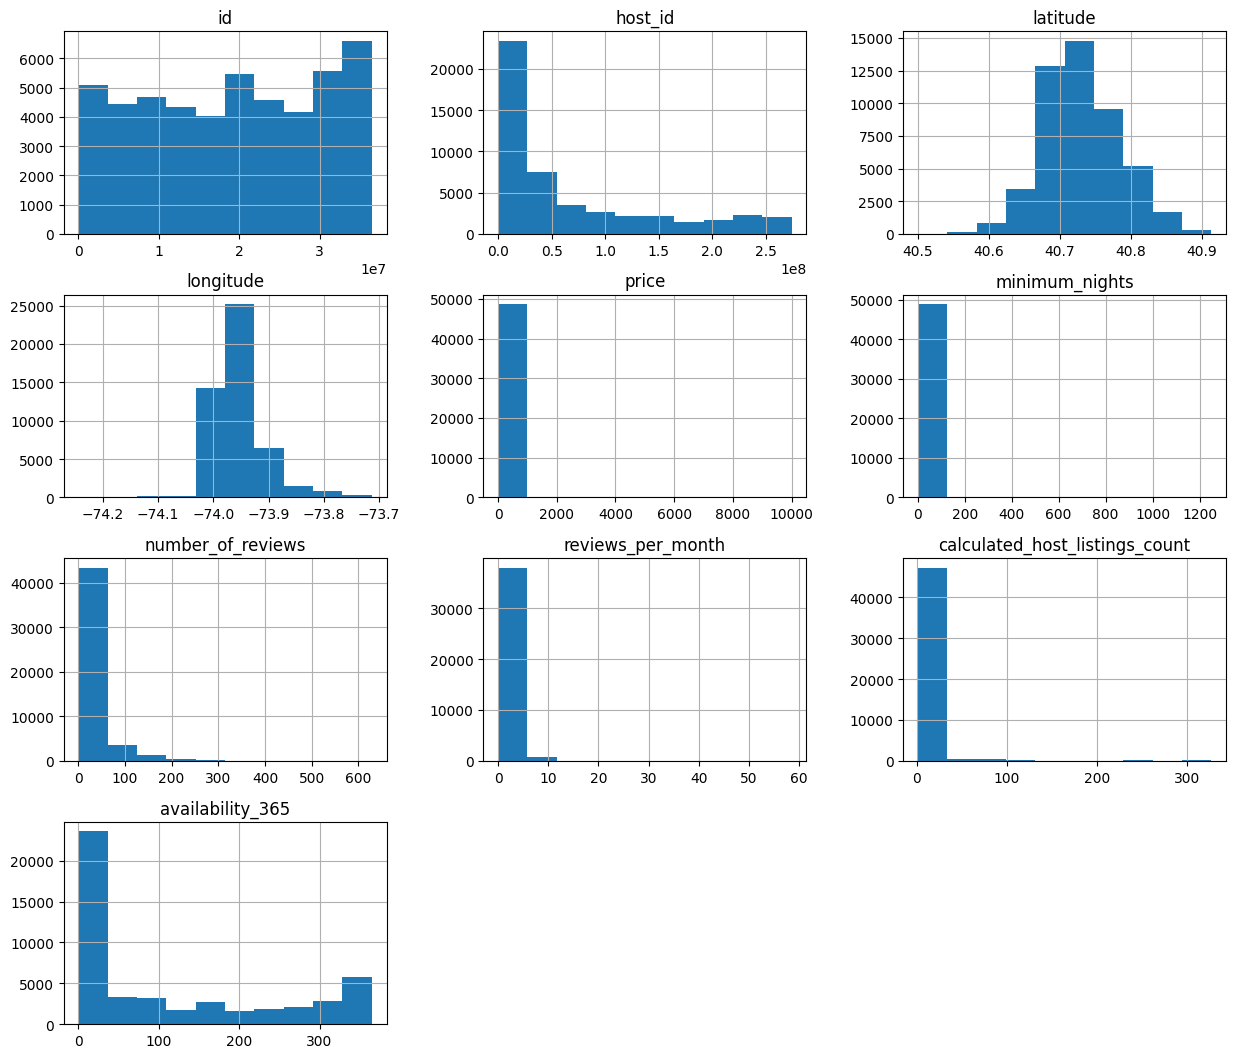

In [6]:
#plots
import matplotlib.pyplot as plt
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

Some predictors that may require special treatment are as follows: 

Host ID: There appears to be a large concentration of properties with low host IDs (i.e., properties hosted by individuals who have been on Airbnb for a long time). This may be a potential outlier or may require special treatment in a predictive model.

Longitude and Latitude: There appears to be some clustering of properties in certain areas (such as Manhattan and Brooklyn), which may need to be accounted for in a predictive model.

Availability 365: There appears to be a large concentration of properties with high availability, which may need to be accounted for in a predictive model.

Based on these findings, we may want to consider some data wrangling steps before building a predictive model. For example:
We may want to remove or treat outliers in the 'host_id' feature.

Some plot exploration:

<Axes: xlabel='neighbourhood_group', ylabel='price'>

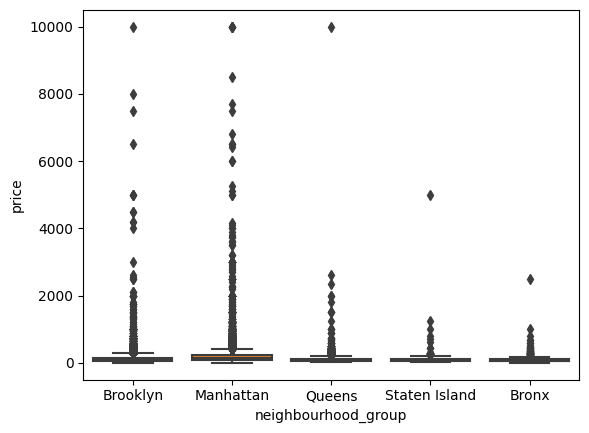

In [7]:
#The resulting plot shows the median prices of properties in each neighbourhood group
sns.boxplot(x="neighbourhood_group", y="price", data=df)

From this plot, we can see that the median price of properties in Manhattan is much higher than the median price in the other boroughs. This suggests that the "neighbourhood_group" feature could be a useful predictor of price.

<Axes: xlabel='room_type', ylabel='price'>

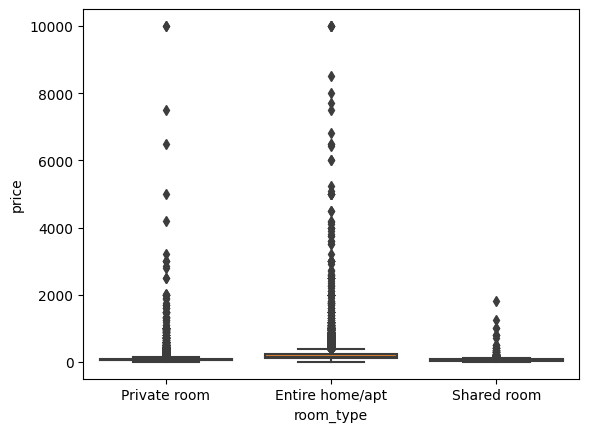

In [8]:
#The resulting plot shows the median prices of each type of room
sns.boxplot(x="room_type", y="price", data=df)

From this plot, we can see that the median price of Entire home/apt is much higher than the median price other types of room. This suggests that the "room_type" feature could be a useful predictor of price.

We can also look at the relationship between continuous features and the "price" variable. One way to do this is to use a scatter plot to visualize the relationship between the two variables:

<Axes: xlabel='longitude', ylabel='latitude'>

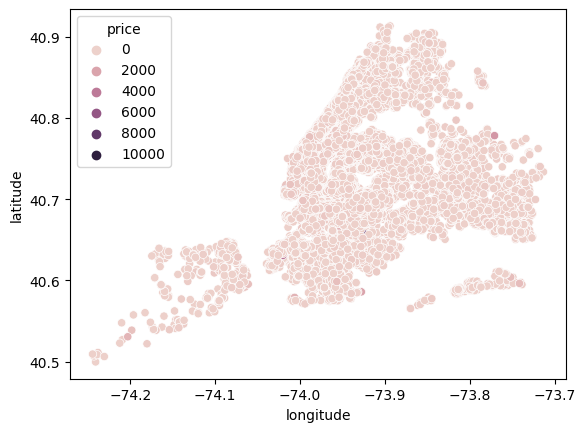

In [9]:
#The resulting plot shows the latitude and longitude of each Airbnb property, with the color indicating the price
sns.scatterplot(x="longitude", y="latitude", hue="price", data=df)

From this plot, we can see that there is a general trend of higher prices in certain areas, such as Manhattan and parts of Brooklyn. This suggests that the "latitude" and "longitude" features could be useful predictors of price.

<Axes: xlabel='minimum_nights', ylabel='price'>

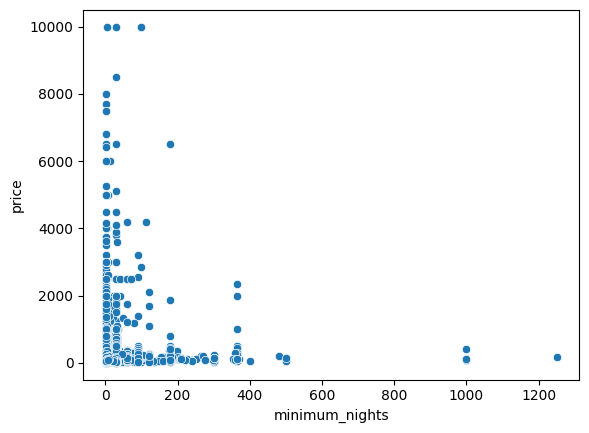

In [10]:
#The resulting plot shows price dependance on minimum nights
sns.scatterplot(x="minimum_nights", y="price",data=df)

<Axes: xlabel='number_of_reviews', ylabel='price'>

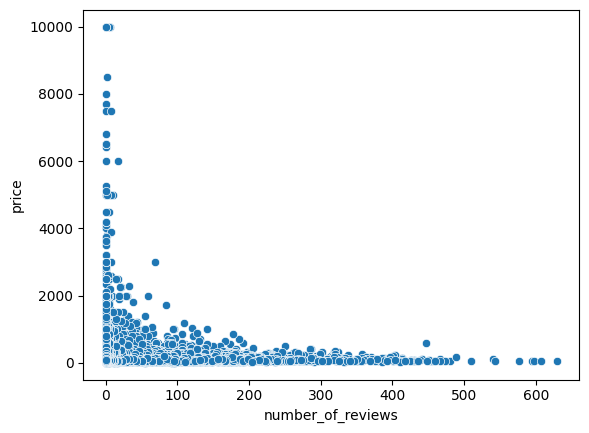

In [11]:
#The resulting plot shows price dependance on number of reviews
sns.scatterplot(x="number_of_reviews", y="price",data=df)

<Axes: xlabel='reviews_per_month', ylabel='price'>

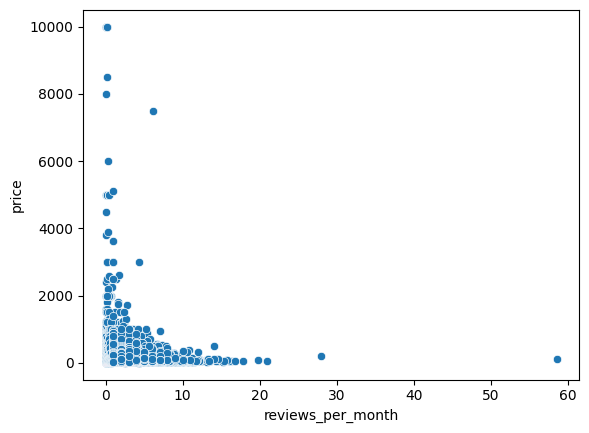

In [12]:
#The resulting plot shows price dependance on reviews per month
sns.scatterplot(x="reviews_per_month", y="price",data=df)

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

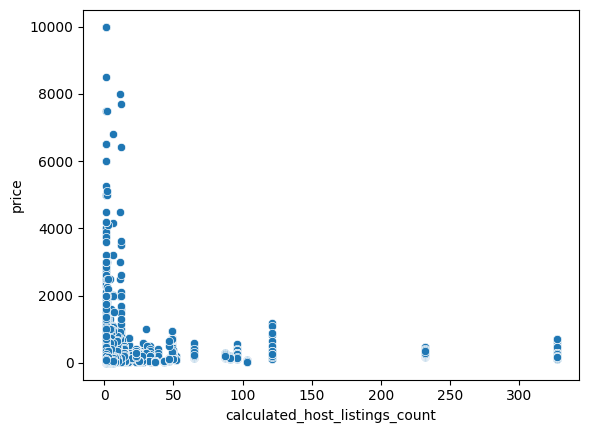

In [13]:
#The resulting plot shows price dependance on host listing count
sns.scatterplot(x="calculated_host_listings_count", y="price",data=df)

<Axes: xlabel='availability_365', ylabel='price'>

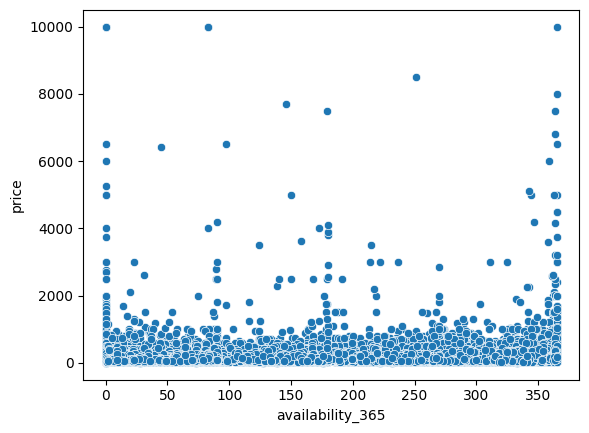

In [14]:
#The resulting plot shows price dependance on availability all year long
sns.scatterplot(x="availability_365", y="price",data=df)

Text(0.5, 1.0, 'Minimum nights vs. price')

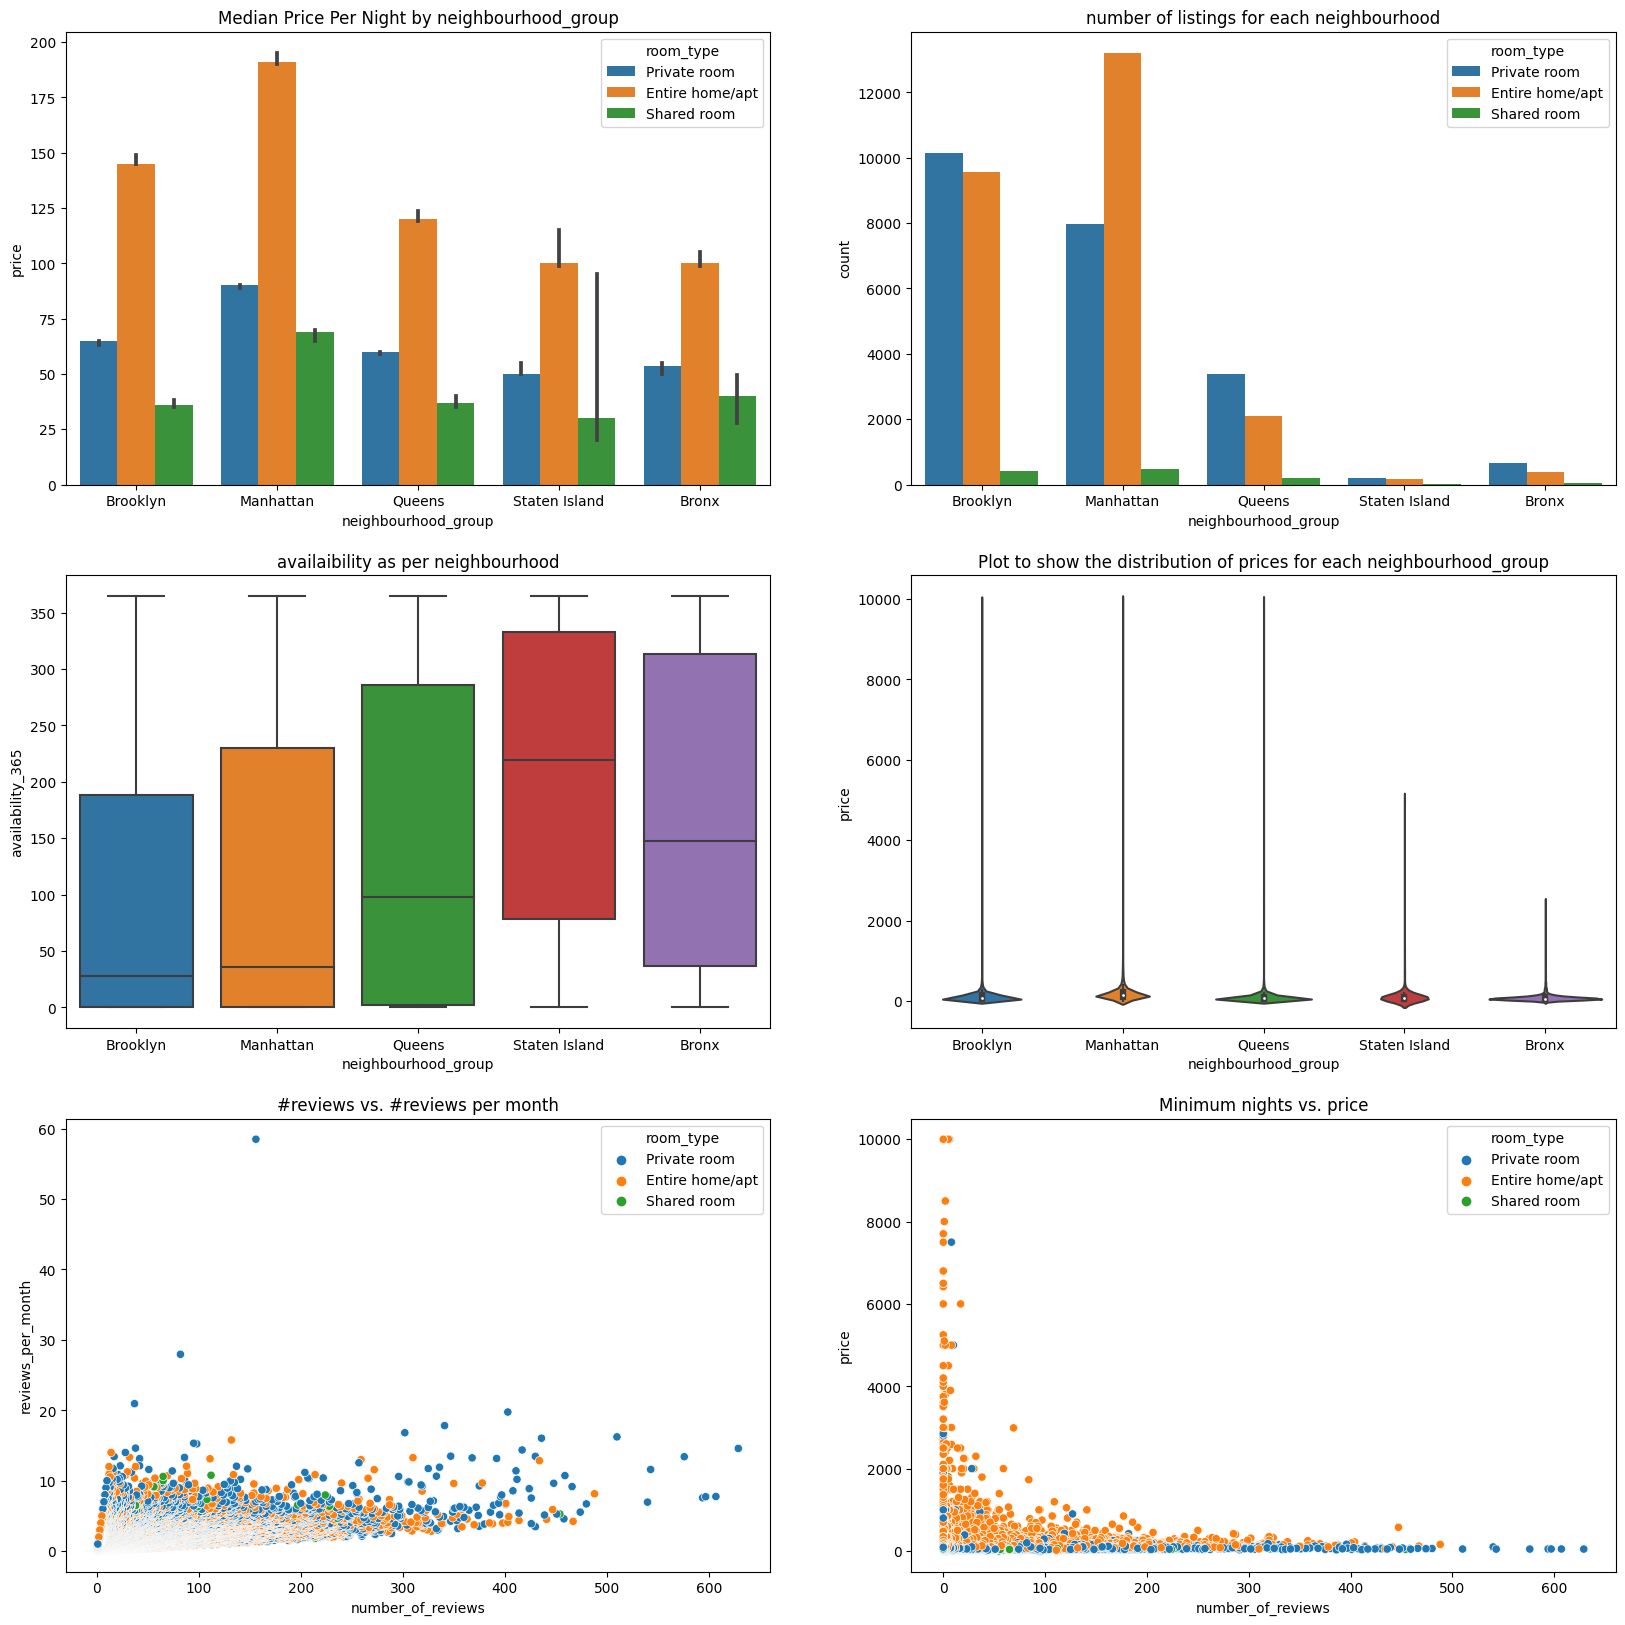

In [15]:
#subplots
import numpy as np
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
sns.barplot(x="neighbourhood_group", y="price",hue="room_type",estimator=np.median, 
            data=df,ax=ax1).set_title("Median Price Per Night by neighbourhood_group")
sns.countplot(x="neighbourhood_group",hue="room_type",data=df,ax=ax2).set_title("number of listings for each neighbourhood")
sns.boxplot(x="neighbourhood_group",y="availability_365",data=df,ax=ax3).set_title("availaibility as per neighbourhood")
sns.violinplot(x="neighbourhood_group",y="price",data=df,ax=ax4).set_title("Plot to show the distribution of prices for each neighbourhood_group")

#To check the number of reviews per month correlation
sns.scatterplot(data=df,x="number_of_reviews",y="reviews_per_month",hue="room_type",ax=ax5).set_title("#reviews vs. #reviews per month")

# reviews = more expensive?
sns.scatterplot(data=df,x="number_of_reviews",y="price",hue="room_type",ax=ax6).set_title("Minimum nights vs. price")

This plot shows that Manhattan listings are more expensive compared to other and in room type hotel rooms are expensive

In [16]:
# Split the data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

The parameters for splitting the data is random. We used a split ratio of 70/30, where 70% of the data is used for training and 30% for testing. We have also randomly shuffled the data before splitting it into training and testing datasets, as it helps ensure that the training and testing datasets have similar distributions of data. Stratified sampling is not necessary here as the dataset is not imbalanced, meaning that some classes or categories are not much more common than others.

In [17]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In the identified features, only 'reviews_per_month' is the feature with missing values which is calculated by the number of reviews divided by the number of months. We cannot drop this feature as it is an important factor in our model and could lead to errors further down the line. We can assign the missing values to 0 as the number of reviews are 0 for these properties.

In [18]:
#dropping unnecessary columns
df.drop(['neighbourhood','name','id','host_name','last_review' ], axis = 1, inplace=True)
df.head(3)

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [19]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
train_new_set, test_new_set = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [21]:
# revert to a clean training set 
# separate the predictors and the labels
df = train_new_set.drop("price", axis=1)
df_labels = train_new_set["price"].copy()

In [22]:
df_labels.head()

5892      75
9517     200
19234     60
9448     200
38759    245
Name: price, dtype: int64

In [23]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])

In [24]:
df_numerical.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5892,19841476,40.80161,-73.94277,1,7,0.20,1,0
9517,38297695,40.67797,-73.97010,2,1,0.02,1,0
19234,97536353,40.58929,-73.79441,3,3,0.10,2,0
9448,920222,40.72259,-73.99311,3,18,0.37,1,188
38759,107434423,40.74108,-73.97788,30,0,NaN,232,280


In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat = df[["neighbourhood_group"]]
cat_encoded = ordinal_encoder.fit_transform(cat)
cat_encoded[:5]

array([[2.],
       [1.],
       [3.],
       [2.],
       [2.]])

In [26]:
ordinal_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(cat)
cat_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [28]:
# get the list of categories
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat = df[["room_type"]]
cat_encoded = ordinal_encoder.fit_transform(cat)
cat_encoded[:3]

array([[1.],
       [0.],
       [1.]])

In [30]:
ordinal_encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [31]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(cat)
cat_1hot.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [32]:
# get the list of categories
cat_encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [33]:
# Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin
class AirbnbFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new = X.copy()
        host_id_count = X_new.groupby('host_id')['host_id'].transform('count')
        X_new['host_id_count'] = host_id_count
        reviews_per_month_filled = X_new['reviews_per_month'].fillna(0)
        X_new['reviews_per_month_filled'] = reviews_per_month_filled
        X_new = X_new.drop(['host_id', 'reviews_per_month'], axis=1)
        return X_new
attr_adder = AirbnbFeatureTransformer()
extra_attribs = attr_adder.transform(df)
extra_attribs.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_id_count,reviews_per_month_filled
5892,Manhattan,40.80161,-73.94277,Private room,1,7,1,0,1,0.20
9517,Brooklyn,40.67797,-73.97010,Entire home/apt,2,1,1,0,1,0.02
19234,Queens,40.58929,-73.79441,Private room,3,3,2,0,1,0.10
9448,Manhattan,40.72259,-73.99311,Entire home/apt,3,18,1,188,1,0.37
38759,Manhattan,40.74108,-73.97788,Entire home/apt,30,0,232,280,168,0.00


In [34]:
# Transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('feature_transformer', AirbnbFeatureTransformer()),
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_numerical)

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_numerical)
cat_attribs = ["room_type"]
cat_attribs1 = ["neighbourhood_group"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("cat1", OneHotEncoder(), cat_attribs1)
    ])

df_prepared = full_pipeline.fit_transform(df)

In [36]:
df_prepared.shape

(34226, 16)

In [37]:
full_pipeline.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('feature_transformer',
                                                  AirbnbFeatureTransformer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['host_id', 'latitude', 'longitude',
                                  'minimum_nights', 'number_of_reviews',
                                  'reviews_per_month',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('cat', OneHotEncoder(), ['room_type']),
                                ('cat1', OneHotEncoder(),
                                 ['neighbourhood_group'])])>

In [38]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

223.9823850038625

In [40]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

73.98193259510313

In [41]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [42]:
# Using Linear Regressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, train_size=0.7, test_size=0.3, random_state=100)

# Choose two columns for scaling
columns_to_scale = ["latitude", "longitude"]

# Create a ColumnTransformer to apply the scalers to the selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), columns_to_scale),
        ("num_minmax", MinMaxScaler(), columns_to_scale),
        ("num_robust", RobustScaler(), columns_to_scale)
    ])

# Create the pipeline with preprocessor, model, and scaler steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Change to DecisionTreeRegressor() for Decision Tree model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error) for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("RMSE:", rmse)


RMSE: 247.71974175077105


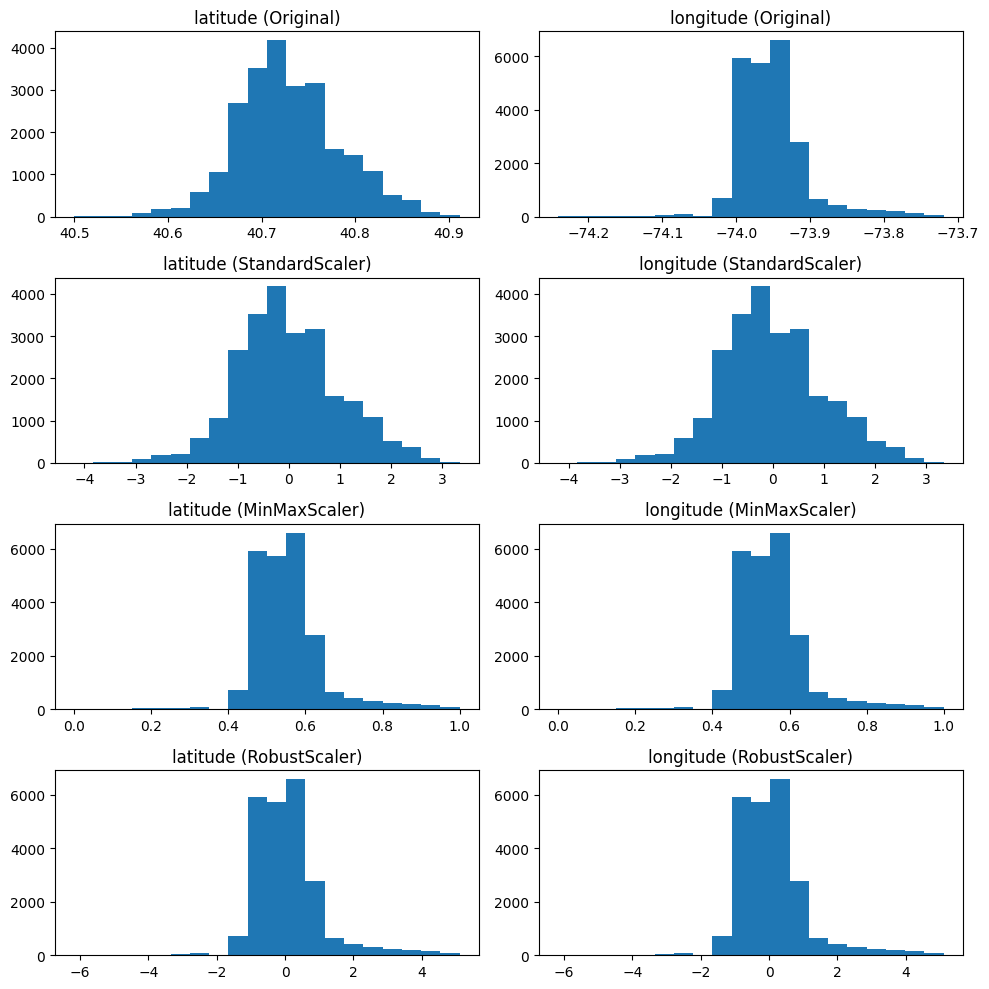

In [47]:
import matplotlib.pyplot as plo
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Choose two columns from X_train
column1 = 'latitude'
column2 = 'longitude'

# Extract the original values
x1_original = X_train[column1]
x2_original = X_train[column2]

# Apply StandardScaler to column1 and MinMaxScaler to column2
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()

x1_scaled_standard = scaler1.fit_transform(X_train[[column1]])
x2_scaled_minmax = scaler2.fit_transform(X_train[[column2]])
x2_scaled_robust = scaler3.fit_transform(X_train[[column2]])

# Create subplots to compare original values with scaled values
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Original data
axs[0, 0].hist(x1_original, bins=20)
axs[0, 0].set_title(column1 + ' (Original)')
axs[0, 1].hist(x2_original, bins=20)
axs[0, 1].set_title(column2 + ' (Original)')

# StandardScaler
axs[1, 0].hist(x1_scaled_standard, bins=20)
axs[1, 0].set_title(column1 + ' (StandardScaler)')
axs[1, 1].hist(x1_scaled_standard, bins=20)
axs[1, 1].set_title(column2 + ' (StandardScaler)')

# MinMaxScaler
axs[2, 0].hist(x2_scaled_minmax, bins=20)
axs[2, 0].set_title(column1 + ' (MinMaxScaler)')
axs[2, 1].hist(x2_scaled_minmax, bins=20)
axs[2, 1].set_title(column2 + ' (MinMaxScaler)')

# RobustScaler
axs[3, 0].hist(x2_scaled_robust, bins=20)
axs[3, 0].set_title(column1 + ' (RobustScaler)')
axs[3, 1].hist(x2_scaled_robust, bins=20)
axs[3, 1].set_title(column2 + ' (RobustScaler)')

plt.tight_layout()
plt.show()

In [48]:
# Using Decision Tree Regressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, train_size=0.7, test_size=0.3, random_state=100)

# Choose two columns for scaling
columns_to_scale = ["latitude", "longitude"]

# Create a ColumnTransformer to apply the scalers to the selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), columns_to_scale),
        ("num_minmax", MinMaxScaler(), columns_to_scale),
        ("num_robust", RobustScaler(), columns_to_scale)
    ])

# Create the pipeline with preprocessor, model, and scaler steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())  
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error) for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("RMSE:", rmse)


RMSE: 337.8028652330255
